# STATISTICS

In [1]:
# you start empty df
# loop over mt files
# create subdf that has only movement for the particular tier
# and then you calculate for this file whatever you want
# and append it to the empty df with the trialID 
import os
import glob
import pandas as pd
import numpy as np
import math
#import pyentrp


#import antropy as ant
#import pyentrp

#from pyentrp import entropy as ent

import scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import math

import xml.etree.ElementTree as ET

curfolder = os.getcwd()
print(curfolder)


features = curfolder + '/feature_extraction_with2d.csv'
features = pd.read_csv(features)



/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning


# Normalize all the feature data

In [2]:
from sklearn.preprocessing import StandardScaler
normed_features = features.copy()
normed_features = normed_features.replace([np.inf, -np.inf], 0)
normed_features
normed_features[normed_features.columns[31:]] = StandardScaler().fit_transform(normed_features[normed_features.columns[31:]])

In [3]:
normed_features

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,right_wrist_entropy2D,left_wrist_entropy2D,right_knee_entropy2D,left_knee_entropy2D,right_ankle_entropy2D,left_ankle_entropy2D,total_body_entropy2D,right_wrist_variability2D,left_wrist_variability2D,total_body_variability2D
0,2024-06-22 20:56:58,2024-06-22 20:59:26,IP Address,80.187.86.160,100.0,148.0,True,2024-06-22 20:59:27,R_2PNn6u3joW9B5IJ,NaN,...,0.495286,0.560880,0.899488,0.866993,0.680163,0.550959,0.779203,-0.276263,-0.058708,-0.207283
1,2024-06-22 17:29:38,2024-06-22 17:31:36,IP Address,176.3.80.248,100.0,118.0,True,2024-06-22 17:31:36,R_25HJFomSmkK8758,NaN,...,0.023459,0.051849,0.838801,0.727981,0.725946,0.516088,0.603655,1.528371,1.046695,1.581409
2,2024-06-22 18:30:47,2024-06-22 18:32:31,IP Address,80.187.84.147,100.0,104.0,True,2024-06-22 18:32:32,R_2CBcu7cAm27UMef,NaN,...,0.627952,0.503750,0.949631,0.661755,1.024115,1.028199,0.926271,0.051136,-0.049661,0.001924
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.167258,-0.128639,0.636401,0.564601,0.752986,0.649003,0.509247,0.910359,0.298742,0.746443
4,2024-06-22 20:54:31,2024-06-22 20:57:15,IP Address,80.187.84.242,100.0,164.0,True,2024-06-22 20:57:15,R_8rc4FUsJ2DdEwxu,NaN,...,-2.029774,-1.940914,-1.189727,-1.190929,-1.191256,-1.190852,-1.549529,3.486581,-0.871142,1.645392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2024-06-22 18:29:04,2024-06-22 18:30:21,IP Address,176.0.161.7,100.0,77.0,True,2024-06-22 18:30:22,R_20d86fCIwghMdnM,NaN,...,0.903087,0.702404,1.015849,0.845445,1.026843,0.933738,1.023260,0.228251,0.825232,0.638925
294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.591376,0.960454,0.884009,0.932455,0.908294,0.821209,0.969321,-0.539075,-0.295247,-0.513266
295,2024-06-22 21:28:18,2024-06-22 21:29:25,IP Address,176.0.151.223,100.0,67.0,True,2024-06-22 21:29:26,R_2hVWjGGcFebSTTX,NaN,...,0.575175,0.643059,0.893696,0.926732,0.811603,0.784205,0.889766,-0.580488,-0.042908,-0.387107
296,2024-06-22 20:56:58,2024-06-22 20:59:26,IP Address,80.187.86.160,100.0,148.0,True,2024-06-22 20:59:27,R_2PNn6u3joW9B5IJ,NaN,...,-1.650799,-0.927376,-1.189727,-1.190929,-1.191256,-1.190852,-1.344656,2.495178,2.941703,3.324093


# SeaBorn Plots

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

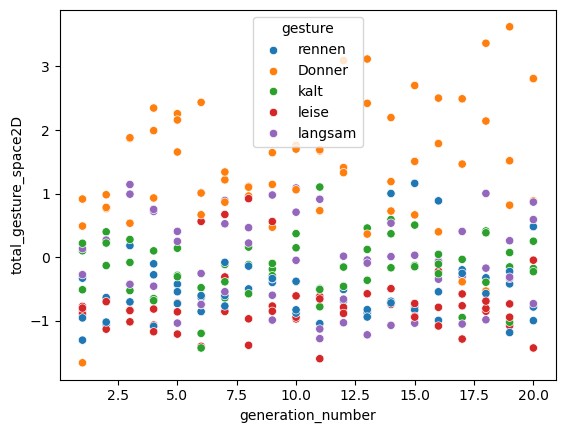

In [4]:
import seaborn as sns
import seaborn.objects as so
sns.scatterplot(data=normed_features, x="generation_number", y="total_gesture_space2D", hue="gesture")

# UMAP

In [5]:
import umap
reducer = umap.UMAP()

/opt/anaconda3/envs/umap_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
embedding = reducer.fit_transform(normed_features[normed_features.columns[31:]])
embedding.shape

/opt/anaconda3/envs/umap_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(298, 2)

In [7]:
embeddings = pd.DataFrame(embedding)
features["X_embeddings"] = embeddings.iloc[:, 0]
features["Y_embeddings"] = embeddings.iloc[:, 1]
normed_features["X_embeddings"] = embeddings.iloc[:, 0]
normed_features["Y_embeddings"] = embeddings.iloc[:, 1]

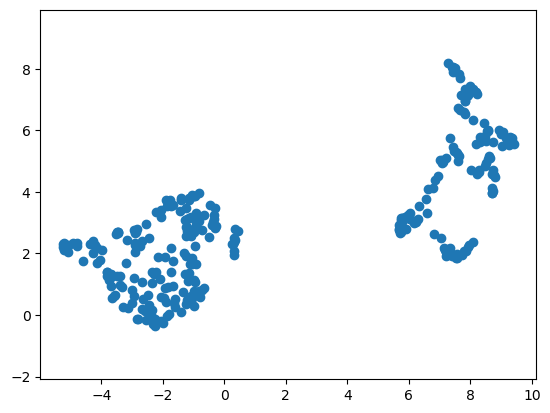

In [8]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
plt.gca().set_aspect('equal', 'datalim'))

<Axes: xlabel='X_embeddings', ylabel='Y_embeddings'>

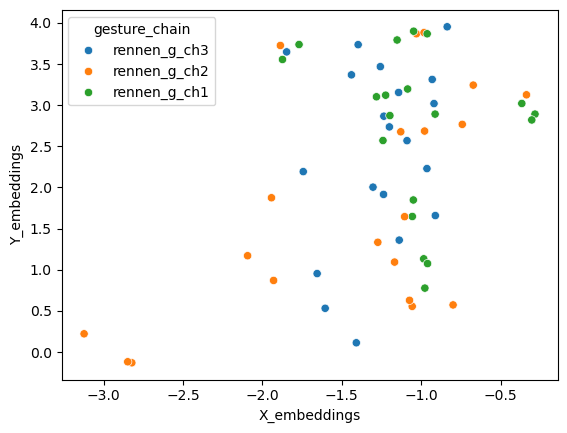

In [9]:
# graph a specific gesture and its differen't chains
specific = features[normed_features['gesture'] == 'rennen']
sns.scatterplot(data=specific, x="X_embeddings", y="Y_embeddings", hue="gesture_chain")

<Axes: xlabel='X_embeddings', ylabel='Y_embeddings'>

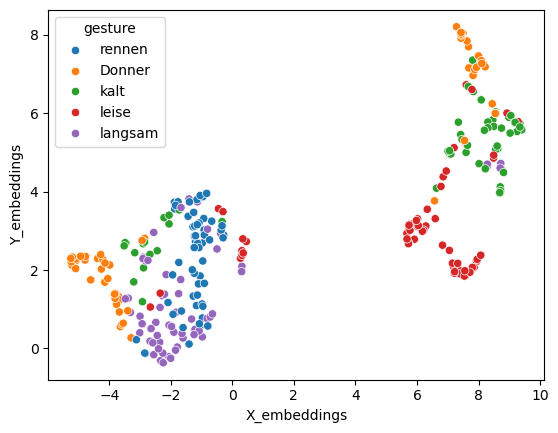

In [10]:
sns.scatterplot(data=features, x="X_embeddings", y="Y_embeddings", hue="gesture")

# Euclidean Distances

Comparing Two Vectors

In [42]:
# make sure to put normalized vectors into this function. 
def calculate_distances(feature_vector1, feature_vector2):
    squared_diff =np.square(feature_vector1-feature_vector2)
    sum_squared_diff = np.sum(squared_diff)
    eucl_distance = math.sqrt(sum_squared_diff)
    return eucl_distance

# feed in the dataframe that contains just the vector of features.
def calculate_distances_to_all(target_segment_index, array):
    target_segment = array[target_segment_index]
    distances = np.empty(array.shape[0])
    i = 0
    for row in array:
        distances[i] = calculate_distances(target_segment, row)
        i = i+1
    return distances


Comparing all vectors to each other and saving in a dataframe

In [45]:
interseg_dist = np.empty(normed_features[normed_features.columns[31:60]].shape)
interseg_dist = pd.DataFrame(interseg_dist)
interseg_dist = pd.DataFrame()
#make individual id for each segment
df_of_vectors = normed_features[normed_features.columns[31:60]].copy()
df_of_vectors = df_of_vectors.to_numpy()

# calculate distance between each segment
for i in range (normed_features[normed_features.columns[31:60]].shape[0]):
    id = normed_features.loc[i, 'fileID']
    interseg_dist_vector = calculate_distances_to_all(i, df_of_vectors)
    #interseg_dist_vector = interseg_dist_vector.reshape(1, -1)
    interseg_dist = interseg_dist.rename(index={i: id})
    interseg_dist = interseg_dist.rename(columns={i: id})
    interseg_dist[id] = interseg_dist_vector

globals()["interseg_dist"] = interseg_dist
globals()["interseg_dist"].to_csv(os.path.join(curfolder, f'{"interseg_dist"}.csv'), index=False)

calculate mean distances

In [ ]:
#??????

Visualization of distances